<div style =   "color           : white  ;
                display         : flex   ;
                align-items     : center ;
                justify-content : center ;
                border-radius   : 5px    ;
                background-color: #141f1f;
                font-size       : 200%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 20px;
            margin : auto;
            color  : white"    >
Earthquake damage EDA
</p>
</div>



<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Toolkit
</p>
</div>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import klib
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
# Plot styling
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, learning_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder, RobustScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report

import joblib

<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Import data
</p>
</div>

In [2]:
pd.options.display.max_columns = None
df = pd.read_csv(r"../data/processed/cleaned_data.csv")
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,lost_floors,lost_height,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade,technical_solution_proposed
0,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,9.0,288.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Grade 3,Major repair
1,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,15.0,364.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 5,Reconstruction
2,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,20.0,384.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair
3,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,20.0,312.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair
4,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,30.0,308.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 1,Minor repair


<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Split to data and target
</p>
</div>

In [3]:
# split to data and target
x = df.drop(['damage_grade'], axis=1)
y = df['damage_grade']

x.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,lost_floors,lost_height,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,technical_solution_proposed
0,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,9.0,288.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Major repair
1,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,15.0,364.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Reconstruction
2,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,20.0,384.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Minor repair
3,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,20.0,312.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Minor repair
4,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,30.0,308.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Minor repair


In [4]:
x.shape

(762094, 32)

<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Encoding and Scaling
</p>
</div>

In [5]:
# ordinal encoding
fts_ordinal = ['land_surface_condition', 'roof_type', 'ground_floor_type', 'position']

ordinal_encoder = OrdinalEncoder()

x[fts_ordinal] = ordinal_encoder.fit_transform(x[fts_ordinal])
x.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,lost_floors,lost_height,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,technical_solution_proposed
0,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,9.0,288.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Mud mortar-Stone/Brick,1.0,1.0,Not applicable,3.0,Rectangular,Damaged-Used in risk,Major repair
1,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,15.0,364.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Mud mortar-Stone/Brick,1.0,1.0,Not applicable,3.0,Rectangular,Damaged-Repaired and used,Reconstruction
2,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,20.0,384.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mud mortar-Stone/Brick,1.0,1.0,Not applicable,3.0,Rectangular,Damaged-Repaired and used,Minor repair
3,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,20.0,312.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mud mortar-Stone/Brick,1.0,1.0,Not applicable,3.0,Rectangular,Damaged-Repaired and used,Minor repair
4,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,30.0,308.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mud mortar-Stone/Brick,1.0,1.0,Not applicable,3.0,Rectangular,Damaged-Repaired and used,Minor repair


In [6]:
ordinal_encodings = {}

for feature, categories in zip(fts_ordinal, ordinal_encoder.categories_):
    encoding_dict = {value: encoding for value, encoding in zip(categories, range(len(categories)))}
    ordinal_encodings[feature] = encoding_dict

# Print or use the ordinal_encodings dictionary
ordinal_encodings

{'land_surface_condition': {'Flat': 0, 'Moderate slope': 1, 'Steep slope': 2},
 'roof_type': {'Bamboo/Timber-Heavy roof': 0,
  'Bamboo/Timber-Light roof': 1,
  'RCC/RB/RBC': 2},
 'ground_floor_type': {'Brick/Stone': 0, 'Mud': 1, 'RC': 2, 'Timber': 3},
 'position': {'Attached-1 side': 0,
  'Attached-2 side': 1,
  'Attached-3 side': 2,
  'Not attached': 3}}

In [7]:
# cat encoding
x_encoded = pd.get_dummies(x)
x_encoded.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,lost_floors,lost_height,land_surface_condition,roof_type,ground_floor_type,position,foundation_type_Bamboo/Timber,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_RC,other_floor_type_Not applicable,other_floor_type_RCC/RB/RBC,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape,condition_post_eq_Covered by landslide,condition_post_eq_Damaged-Not used,condition_post_eq_Damaged-Repaired and used,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged,technical_solution_proposed_Major repair,technical_solution_proposed_Minor repair,technical_solution_proposed_No need,technical_solution_proposed_Reconstruction
0,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,9.0,288.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
1,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,15.0,364.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
2,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,20.0,384.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
3,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,20.0,312.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
4,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,30.0,308.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False


In [8]:
x_encoded.shape

(762094, 56)

In [9]:
scaler = StandardScaler()


x_scaled = pd.DataFrame(scaler.fit_transform(x_encoded), columns=x_encoded.columns)
x_scaled.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,lost_floors,lost_height,land_surface_condition,roof_type,ground_floor_type,position,foundation_type_Bamboo/Timber,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_RC,other_floor_type_Not applicable,other_floor_type_RCC/RB/RBC,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape,condition_post_eq_Covered by landslide,condition_post_eq_Damaged-Not used,condition_post_eq_Damaged-Repaired and used,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged,technical_solution_proposed_Major repair,technical_solution_proposed_Minor repair,technical_solution_proposed_No need,technical_solution_proposed_Reconstruction
0,-2.424241,-2.370686,-2.367099,-2.367138,-1.662343,-0.23608,-0.235645,-0.523298,-1.284393,-0.099159,-0.210426,0.49958,-0.190788,-0.126767,-0.153302,-0.277555,-0.590854,3.380075,-0.203577,-0.129071,-0.110329,-0.770165,-0.753561,-0.427257,0.412453,-0.041666,0.50397,-0.285595,-0.233007,0.451056,-0.209766,2.326757,-0.211877,-1.330176,-0.440029,-0.011341,-0.013555,-0.010246,-0.11577,-0.035142,0.203587,-0.153646,-0.035681,-0.024253,-0.022394,-0.612624,-0.405884,-0.213186,-0.39352,-0.444325,2.270179,-0.295334,2.211054,-0.412035,-0.270205,-1.269263
1,-2.424241,-2.370686,-2.367099,-2.367138,-1.662343,-0.23608,-0.143386,-0.188172,-1.284393,-0.099159,-0.210426,0.49958,-0.190788,-0.126767,-0.153302,-0.277555,-0.590854,3.380075,-0.203577,-0.129071,-0.110329,-0.770165,-0.753561,-0.427257,0.412453,-0.041666,0.50397,-0.285595,-0.233007,0.451056,-0.209766,2.326757,-0.211877,-1.330176,-0.440029,-0.011341,-0.013555,-0.010246,-0.11577,-0.035142,0.203587,-0.153646,-0.035681,-0.024253,-0.022394,-0.612624,2.463759,-0.213186,-0.39352,-0.444325,-0.440494,-0.295334,-0.452273,-0.412035,-0.270205,0.787859
2,-2.424241,-2.370686,-2.367099,-2.367138,-1.662343,-0.23608,-0.066504,-0.099981,-1.284393,-0.099159,-0.210426,0.49958,-0.190788,-0.126767,-0.153302,-0.277555,-0.590854,-0.295851,-0.203577,-0.129071,-0.110329,-0.770165,-0.753561,-0.427257,0.412453,-0.041666,0.50397,-0.285595,-0.233007,0.451056,-0.209766,2.326757,-0.211877,-1.330176,-0.440029,-0.011341,-0.013555,-0.010246,-0.11577,-0.035142,0.203587,-0.153646,-0.035681,-0.024253,-0.022394,-0.612624,2.463759,-0.213186,-0.39352,-0.444325,-0.440494,-0.295334,-0.452273,2.426980,-0.270205,-1.269263
3,-2.424241,-2.370686,-2.367099,-2.367138,-1.662343,-0.23608,-0.066504,-0.417469,-1.284393,-0.099159,-0.210426,0.49958,-0.190788,-0.126767,-0.153302,-0.277555,-0.590854,-0.295851,-0.203577,-0.129071,-0.110329,-0.770165,-0.753561,-0.427257,0.412453,-0.041666,0.50397,-0.285595,-0.233007,0.451056,-0.209766,2.326757,-0.211877,-1.330176,-0.440029,-0.011341,-0.013555,-0.010246,-0.11577,-0.035142,0.203587,-0.153646,-0.035681,-0.024253,-0.022394,-0.612624,2.463759,-0.213186,-0.39352,-0.444325,-0.440494,-0.295334,-0.452273,2.426980,-0.270205,-1.269263
4,-2.424241,-2.370686,-2.367099,-2.367138,-1.662343,-0.23608,0.087261,-0.435107,-1.284393,-0.099159,-0.210426,0.49958,-0.190788,-0.126767,-0.153302,-0.277555,-0.590854,-0.295851,-0.203577,-0.129071,-0.11

In [10]:
# # Identify columns
# fts_cvt_obj = ['district_id', 'vdcmun_id', 'ward_id']
# fts_outlier = ['age_building']
# fts_ordinal = ['land_surface_condition', 'roof_type', 'ground_floor_type', 'position']

# # Outlier Restriction
# trans_outlier = Pipeline(steps=[('Outlier_scaler', RobustScaler(quantile_range=(0, 0.9)))])

# # Combined Preprocessor
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]), x.select_dtypes(include='O').columns),  # One Hot encode
#         ('ordinal', Pipeline(steps=[('ordinal', OrdinalEncoder())]), fts_ordinal),
#         ('Outlier', trans_outlier, fts_outlier),  # Outlier treatment 
#         ('num', Pipeline(steps=[
#             ('scaler', StandardScaler()),
#             ('MiAnMax', MinMaxScaler()),
#             ('nzv', VarianceThreshold(threshold=0.01))
#         ]), x.select_dtypes(exclude='O').columns),  # Centre and scale
#     ])

# # Apply the transformations to both train and test
# x_processed = preprocessor.fit_transform(x) 

# # Get feature names after transformation
# feature_names_out = preprocessor.get_feature_names_out(input_features=x.columns)

# # Create DataFrame with transformed data
# x_processed = pd.DataFrame(x_processed, columns=feature_names_out)

# print(f"x_processed shape is {x_processed.shape}")
# x_processed.head()

<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Feature Selection
</p>
</div>

In [11]:
x['district_id'].nunique()

11

In [12]:
x['building_id'].nunique()

762094

In [13]:
x['vdcmun_id'].nunique()

110

In [14]:
x['ward_id'].nunique()

945

In [15]:
x_scaled.shape

(762094, 56)

In [16]:
# drop building_id as it has no meaning
x_scaled.drop(['building_id'], axis=1, inplace=True)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_scaled, y)

RandomForestClassifier(random_state=42)

In [17]:
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": x_scaled.columns, "Importance": feature_importances})

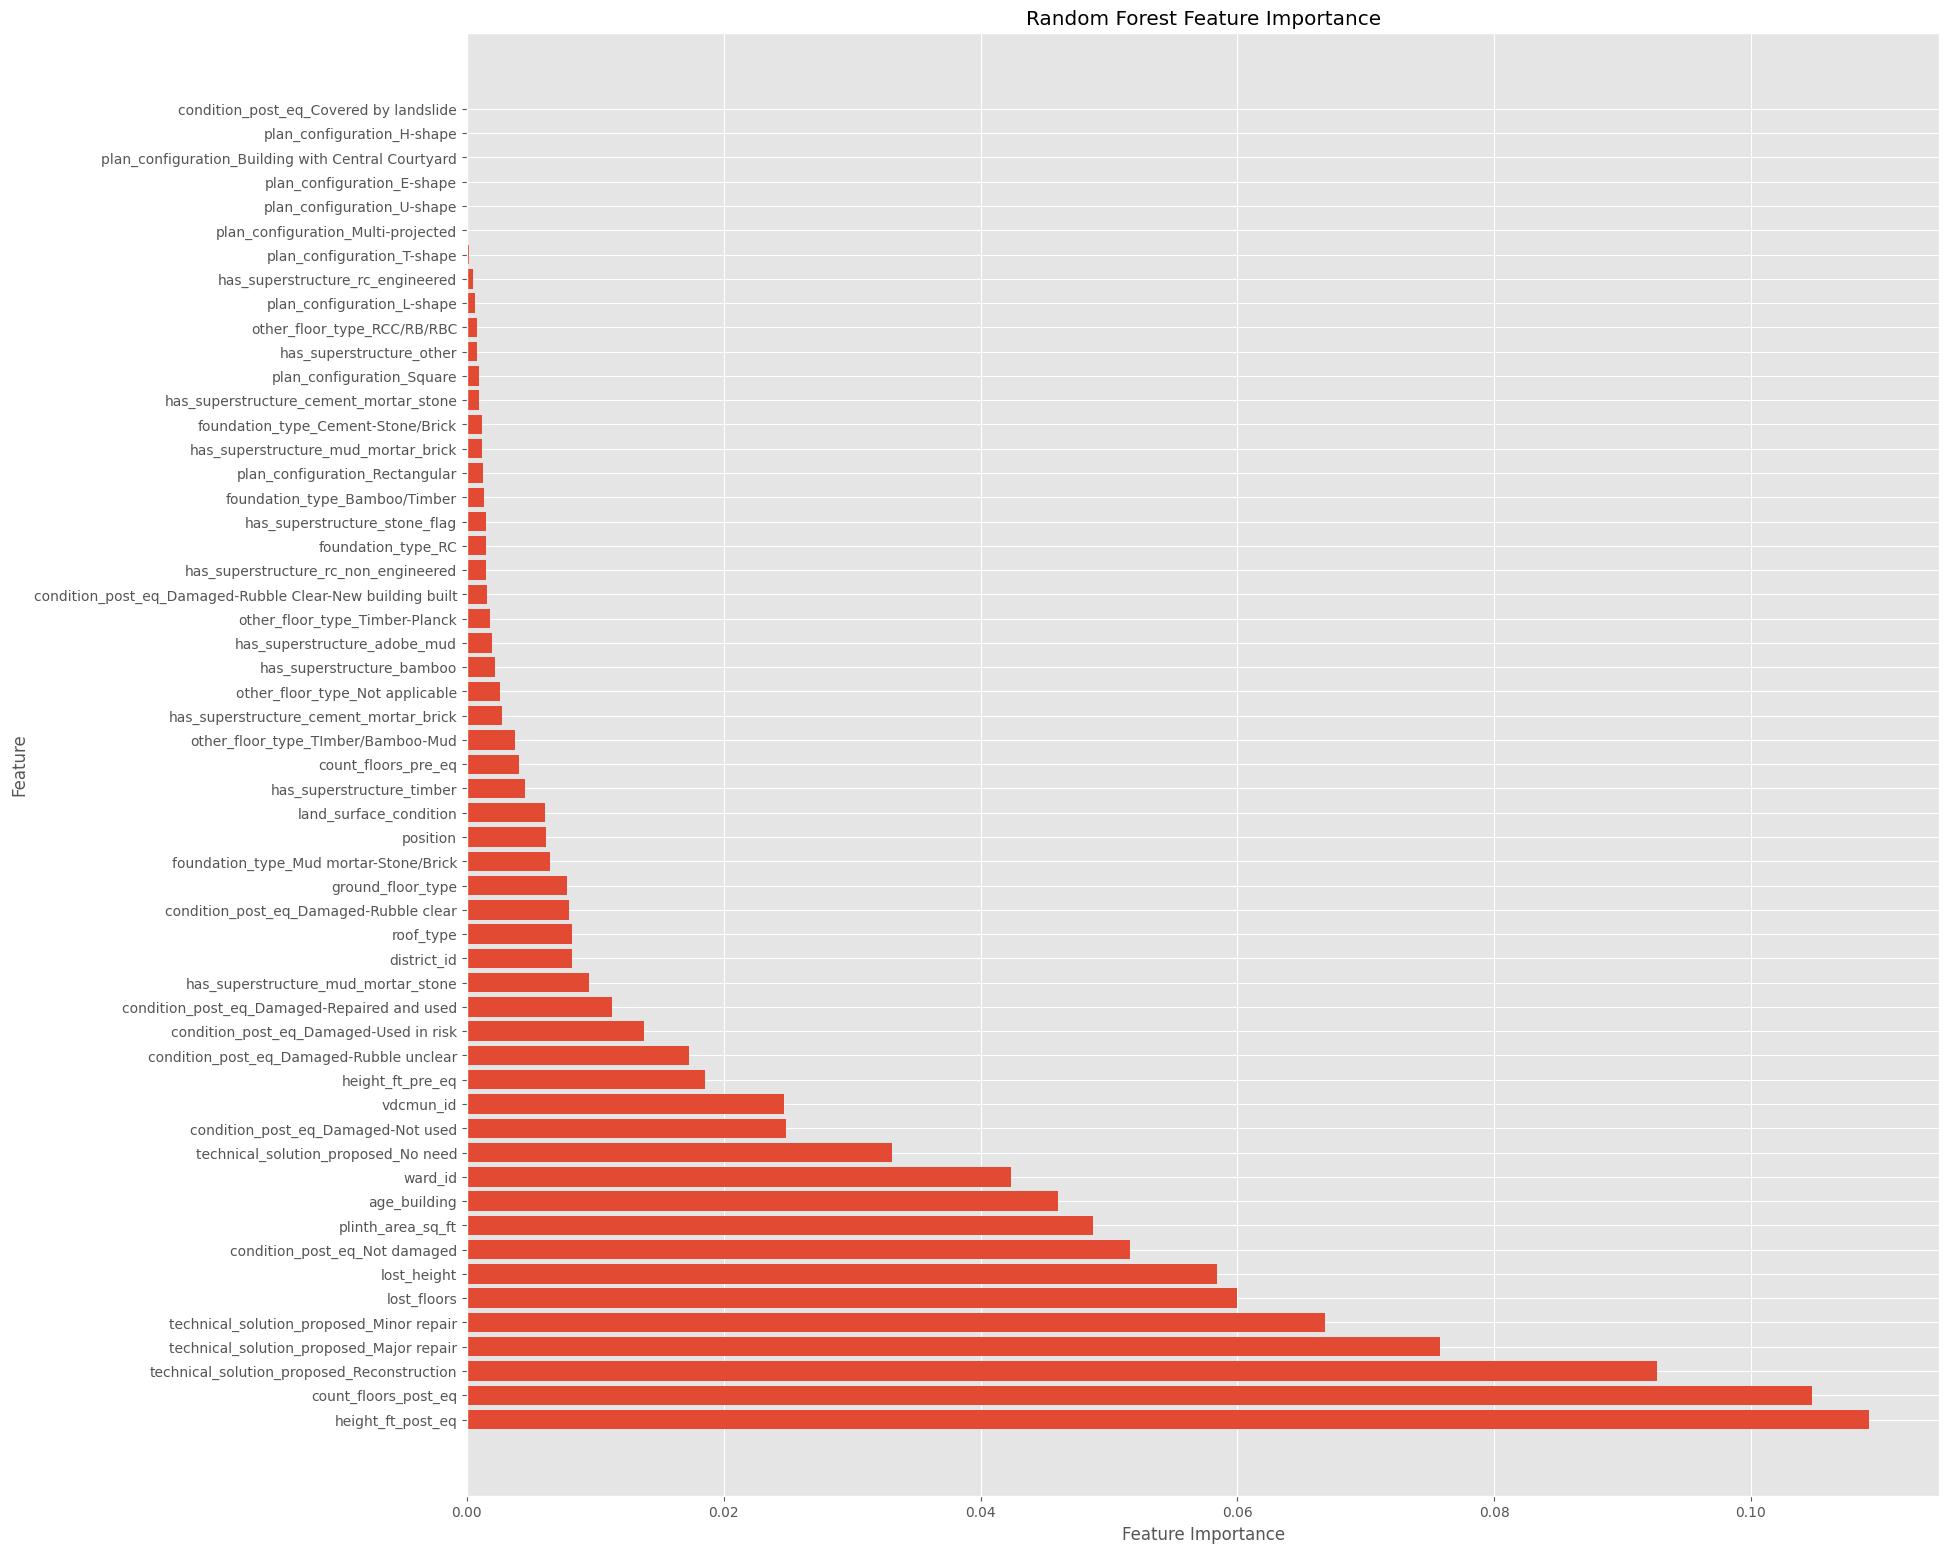

In [18]:
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(19, 19))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()

In [19]:
# Specify the number of top features to select
top_n_features = 30  # Change this to your desired number of top features

# Select the top N features based on importance
top_features = feature_importance_df.head(top_n_features)["Feature"].tolist()

# Create the new DataFrame with selected features
x_selected = x_encoded[top_features]

# scale again
scaler2 = StandardScaler()

x_scaled = pd.DataFrame(scaler2.fit_transform(x_selected), columns=x_selected.columns)
print(x_scaled.shape)
x_scaled.head()

(762094, 30)


,height_ft_post_eq,count_floors_post_eq,technical_solution_proposed_Reconstruction,technical_solution_proposed_Major repair,technical_solution_proposed_Minor repair,lost_floors,lost_height,condition_post_eq_Not damaged,plinth_area_sq_ft,age_building,ward_id,technical_solution_proposed_No need,condition_post_eq_Damaged-Not used,vdcmun_id,height_ft_pre_eq,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Damaged-Repaired and used,has_superstructure_mud_mortar_stone,district_id,roof_type,condition_post_eq_Damaged-Rubble clear,ground_floor_type,foundation_type_Mud mortar-Stone/Brick,position,land_surface_condition,has_superstructure_timber,count_floors_pre_eq,other_floor_type_TImber/Bamboo-Mud,has_superstructure_cement_mortar_brick
0,-0.099159,-0.23608,-1.269263,2.211054,-0.412035,-0.770165,-0.753561,-0.295334,-0.523298,-0.235645,-2.367138,-0.270205,-0.612624,-2.367099,-1.284393,-0.444325,2.270179,-0.405884,0.49958,-2.370686,0.412453,-0.39352,-0.041666,0.451056,0.50397,-0.427257,-0.590854,-1.662343,-1.330176,-0.277555
1,-0.099159,-0.23608,0.787859,-0.452273,-0.412035,-0.770165,-0.753561,-0.295334,-0.188172,-0.143386,-2.367138,-0.270205,-0.612624,-2.367099,-1.284393,-0.444325,-0.440494,2.463759,0.49958,-2.370686,0.412453,-0.39352,-0.041666,0.451056,0.50397,-0.427257,-0.590854,-1.662343,-1.330176,-0.277555
2,-0.099159,-0.23608,-1.269263,-0.452273,2.426980,-0.770165,-0.753561,-0.295334,-0.099981,-0.066504,-2.367138,-0.270205,-0.612624,-2.367099,-1.284393,-0.444325,-0.440494,2.463759,0.49958,-2.370686,0.412453,-0.39352,-0.041666,0.451056,0.50397,-0.427257,-0.590854,-1.662343,-1.330176,-0.277555
3,-0.099159,-0.23608,-1.269263,-0.452273,2.426980,-0.770165,-0.753561,-0.295334,-0.417469,-0.066504,-2.367138,-0.270205,-0.612624,-2.367099,-1.284393,-0.444325,-0.440494,2.463759,0.49958,-2.370686,0.412453,-0.39352,-0.041666,0.451056,0.50397,-0.427257,-0.590854,-1.662343,-1.330176,-0.277555
4,-0.099159,-0.23608,-1.269263,-0.452273,2.426980,-0.770165,-0.753561,-0.295334,-0.435107,0.087261,-2.367138,-0.270205,-0.612624,-2.367099,-1.284393,-0.444325,-0.440494,2.463759,0.49958,-2.370686,0.412453,-0.39352,-0.041666,0.451056,0.50397,-0.427257,-0.590854,-1.662343,-1.330176,-0.277555


In [20]:
# clean columns names
x_scaled.columns = klib.clean_column_names(x_selected).columns
x_scaled.columns

Index(['height_ft_post_eq', 'count_floors_post_eq',
       'technical_solution_proposed_reconstruction',
       'technical_solution_proposed_major_repair',
       'technical_solution_proposed_minor_repair', 'lost_floors',
       'lost_height', 'condition_post_eq_not_damaged', 'plinth_area_sq_ft',
       'age_building', 'ward_id', 'technical_solution_proposed_no_need',
       'condition_post_eq_damaged_not_used', 'vdcmun_id', 'height_ft_pre_eq',
       'condition_post_eq_damaged_rubble_unclear',
       'condition_post_eq_damaged_used_in_risk',
       'condition_post_eq_damaged_repaired_and_used',
       'has_superstructure_mud_mortar_stone', 'district_id', 'roof_type',
       'condition_post_eq_damaged_rubble_clear', 'ground_floor_type',
       'foundation_type_mud_mortar_stone_brick', 'position',
       'land_surface_condition', 'has_superstructure_timber',
       'count_floors_pre_eq', 'other_floor_type_timber_bamboo_mud',
       'has_superstructure_cement_mortar_brick'],
      dtype=

<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Train Test Split
</p>
</div>

In [21]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                    test_size = 0.2, 
                                                    random_state = 0, 
                                                    stratify = y,
                                                    shuffle=True)

print(x_train.shape)
print(y_train.shape)

(609675, 30)
(609675,)


In [22]:
# Visualise proportions on train and test
pd.merge(y_train.reset_index(name="damage_grade", drop=True).value_counts(normalize=True).reset_index(name="train"),
         y_test.reset_index(name="damage_grade",  drop=True).value_counts(normalize=True).reset_index(name="test"),
         on = "damage_grade",
         how = "left")

,damage_grade,train,test
0,Grade 5,0.361853,0.361851
1,Grade 4,0.241235,0.241236
2,Grade 3,0.178995,0.179000
3,Grade 2,0.114497,0.114494
4,Grade 1,0.103419,0.103419


<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Train models
</p>
</div>

In [44]:
# Store the Kfold object
kfold = KFold(n_splits=5, random_state=1989, shuffle = True)

# List of classification models
classifiers = [('KNN', KNeighborsClassifier(n_neighbors=3, n_jobs=-1)),
               ('RF' , RandomForestClassifier(n_jobs=-1)),
               ('GB' , GradientBoostingClassifier()),
               ('XGB', XGBClassifier()),
            ]

# Evaluate each model
results = []
names = []
for name, model in classifiers:
    cv_results = cross_val_score(RandomForestClassifier(), x_train, y_train, cv=kfold, scoring='f1_micro')
    results.append(cv_results)
    names.append(name)
    print(f"{name} : {cv_results.mean()} ({cv_results.std()})")

KNN : 0.8979653093861483 (0.00048433950592096796)
RF : 0.8979144626235289 (0.0004417153459633703)
GB : 0.8980686431295363 (0.0005491669838121017)
XGB : 0.8980063148398736 (0.0005861479685146877)


### `Before low variance or feature selection`
KNN: 0.846102 (0.000414) <br>
RF: 0.901420 (0.000584) 
### `After both but before ordinal encoding`
KNN: 0.856102  <br>
RF: 0.881420  

In [45]:
# Summarise scores
pd.DataFrame(np.transpose(results), columns = names).reset_index()

,index,KNN,RF,GB,XGB
0,0,0.898495,0.898126,0.898454,0.898577
1,1,0.897396,0.897355,0.897601,0.897339
2,2,0.898052,0.898011,0.897741,0.898315
3,3,0.898470,0.898577,0.898963,0.898544
4,4,0.897413,0.897503,0.897585,0.897257


<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Hyper parameter tunning
</p>
</div>

In [23]:
x_train.columns

Index(['height_ft_post_eq', 'count_floors_post_eq',
       'technical_solution_proposed_reconstruction',
       'technical_solution_proposed_major_repair',
       'technical_solution_proposed_minor_repair', 'lost_floors',
       'lost_height', 'condition_post_eq_not_damaged', 'plinth_area_sq_ft',
       'age_building', 'ward_id', 'technical_solution_proposed_no_need',
       'condition_post_eq_damaged_not_used', 'vdcmun_id', 'height_ft_pre_eq',
       'condition_post_eq_damaged_rubble_unclear',
       'condition_post_eq_damaged_used_in_risk',
       'condition_post_eq_damaged_repaired_and_used',
       'has_superstructure_mud_mortar_stone', 'district_id', 'roof_type',
       'condition_post_eq_damaged_rubble_clear', 'ground_floor_type',
       'foundation_type_mud_mortar_stone_brick', 'position',
       'land_surface_condition', 'has_superstructure_timber',
       'count_floors_pre_eq', 'other_floor_type_timber_bamboo_mud',
       'has_superstructure_cement_mortar_brick'],
      dtype=

In [24]:
# Define a smaller hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 8),
    'min_samples_leaf': randint(1, 3)
}

# Create the Random Forest model
rf_model = RandomForestClassifier()

# Use RandomizedSearchCV with reduced search space and iterations
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=5, cv=5, scoring='f1_micro', n_jobs=-1, random_state=42)

# Fit the model to the data
random_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_rf_model = random_search.best_estimator_

# Evaluate the best model on the test set
print("Train Score:", best_rf_model.score(x_train, y_train))
print("Test Score:" , best_rf_model.score(x_test, y_test))


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 149}
Train Score: 0.9085233936113503
Test Score: 0.8948818716826642


0.8948818716826642


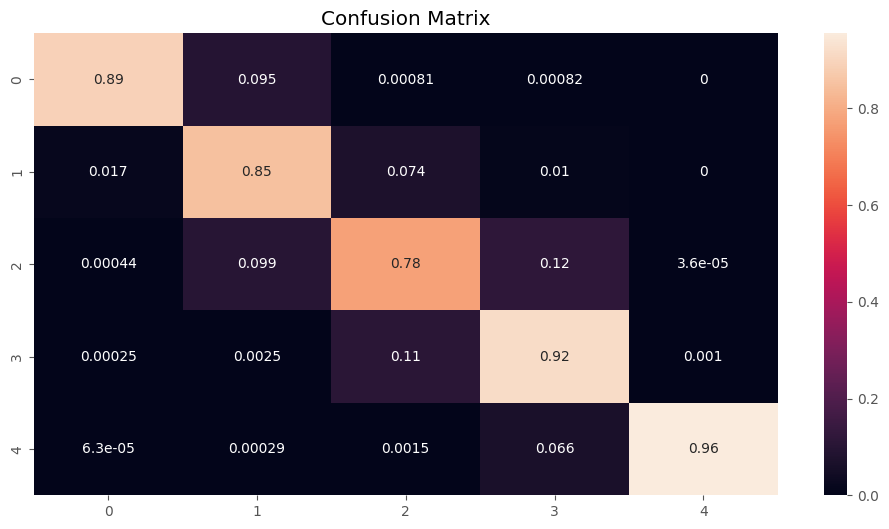

In [25]:
y_pred = best_rf_model.predict(x_test)  # predict on test

# Calculate confusion matrix
con_mat = confusion_matrix(y_test, y_pred)
con_mat = con_mat / con_mat.astype(float).sum(axis=1)  # Use float or np.float64

# Evaluate model
print(f"{f1_score(y_test, y_pred, average='micro')}")

# Plot Model
plt.figure(figsize=(12, 6))
ax = sns.heatmap(con_mat, annot=True)
plt.title("Confusion Matrix")
plt.show()

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Grade 1       0.98      0.89      0.93     15763
     Grade 2       0.81      0.85      0.83     17451
     Grade 3       0.81      0.78      0.79     27283
     Grade 4       0.82      0.92      0.87     36769
     Grade 5       1.00      0.96      0.98     55153

    accuracy                           0.89    152419
   macro avg       0.88      0.88      0.88    152419
weighted avg       0.90      0.89      0.90    152419



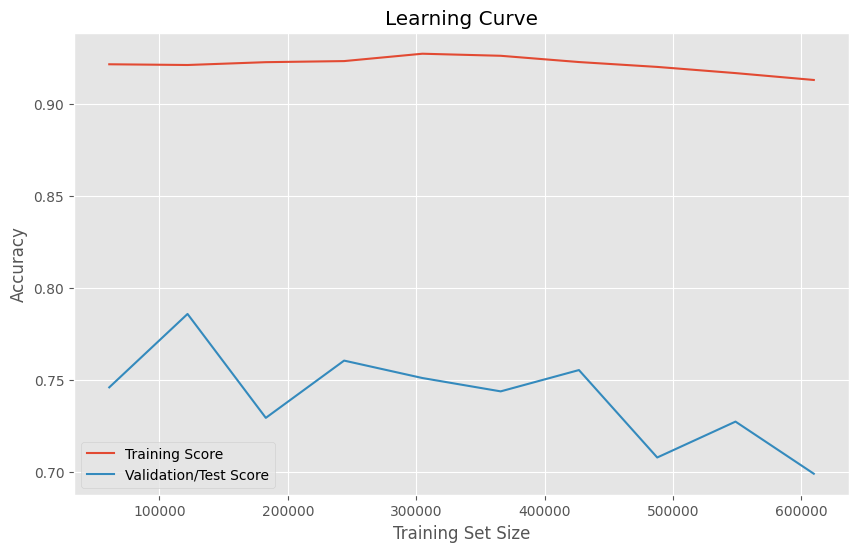

In [55]:
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, x_scaled, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation/Test Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Save model
</p>
</div>

In [27]:
# Save the model to a file
joblib.dump(best_rf_model, '../models/model.h5')

# Save the preprocessors to files
joblib.dump(scaler2, '../models/scaler.h5')

# Save the feature names to a file
with open('../models/features_names.txt', 'w') as file:
    file.write('\n'.join(x_train.columns))
